In [6]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 11.5 MB/s eta 0:00:01     |███████▋                        | 409 kB 11.5 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [5]:
!git clone https://github.com/entelecheia/eKoNLPy.git
!pip install ./eKoNLPy

Cloning into 'eKoNLPy'...
remote: Enumerating objects: 3590, done.
remote: Total 3590 (delta 0), reused 0 (delta 0), pack-reused 3590
Receiving objects: 100% (3590/3590), 73.30 MiB | 22.05 MiB/s, done.
Resolving deltas: 100% (2618/2618), done.
Processing ./eKoNLPy
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for eKoNLPy: filename=eKoNLPy-0.5.30-py3-none-any.whl size=14437139 sha256=4cc0a0e9af1fcfb2baed3e96a77be66e0db6290f372a95ea1fa3fe43706e7087
  Stored in directory: /private/var/folders/gl/xtlj588j4rdcnbyxmk7bz7jh0000gn/T/pip-ephem-wheel-cache-bydrd52s/wheels/30/5d/21/5e3477821d517803b47b1d16bad9d8fd9730b02eab5d3fee81
Succe

In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

CPU times: user 1.19 s, sys: 429 ms, total: 1.62 s
Wall time: 1.91 s


In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
article = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/article.csv')
article

,created_date,article
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...
4,2018-04-03,도자료는 으로
...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...


In [4]:
price = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/price.csv')
price

,trade_date,price,before_price,label
0,2018-03-15,9010234.20891,nan,nan
1,2018-03-16,9024833.95469,9010234.20891,1.00000
2,2018-03-17,9056906.80354,9024833.95469,1.00000
3,2018-03-18,8470860.29412,9056906.80354,0.00000
4,2018-03-19,8970286.25831,8470860.29412,1.00000
...,...,...,...,...
1318,2021-10-23,74501866.23316,76632600.67319,0.00000
1319,2021-10-24,74478050.59524,74501866.23316,0.00000
1320,2021-10-25,75178560.00732,74478050.59524,1.00000
1321,2021-10-26,75581706.19076,75178560.00732,1.00000


In [22]:
article = article.set_index('created_date')
price = price.set_index('trade_date')

df_con = pd.concat([article, price], axis=1).dropna()
df_con = df_con[['article', 'price', 'label']]

df_con

,article,price,before_price,label
2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,9024833.95469,9010234.20891,1.00000
2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,8970286.25831,8470860.29412,1.00000
2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,8437138.68234,8755687.28223,0.00000
2018-04-03,도자료는 으로,7904068.97690,7562219.60652,1.00000
2018-04-04,도자료는 으로 도자료는 으로 도자료는,7943745.49850,7904068.97690,1.00000
...,...,...,...,...
2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,78874213.67708,78423109.61969,1.00000
2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,76632600.67319,78874213.67708,0.00000
2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,75178560.00732,74478050.59524,1.00000
2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,75581706.19076,75178560.00732,1.00000


In [105]:
df_con['article']

2018-03-16     라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...
2018-03-19     콘텐츠 생산자와 추천인에게  상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...
2018-03-29         도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...
2018-04-03                                        도자료는 으로      
2018-04-04             도자료는 으로           도자료는 으로           도자료는
                                    ...                        
2021-10-21      신고점 경신한 비트코인  말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...
2021-10-22     일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...
2021-10-25     조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...
2021-10-26     미국 증권 금융의 최고 규  기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...
2021-10-27      가상자산 데이터 분석 업체 글래스노드가 일 스위스 시간  간 온체인  고서 를 ...
Name: article, Length: 609, dtype: object

In [106]:
df_con['article'] = df_con['article'].apply(lambda x: x.split(' '))
df_con

<ipython-input-106-a5d63c101774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['article'] = df_con['article'].apply(lambda x: x.split(' '))


,article,price,label
2018-03-16,"[, 라인의, 금융, 자회사, 라인, 파이낸셜, 통해, 일본, 금융청에, 가상화폐,...",9024833.95469,1.00000
2018-03-19,"[, 콘텐츠, 생산자와, 추천인에게, , 상, 는, 이용자, 정, 로, 부, 독점,...",8970286.25831,1.00000
2018-03-29,"[, , , , , 도자료는, 당신이, 풀, 노드로, 돌리고, 있는, 블록체인에, ...",8437138.68234,0.00000
2018-04-03,"[, , , , , 도자료는, 으로, , , , , , ]",7904068.97690,1.00000
2018-04-04,"[, , , , , 도자료는, 으로, , , , , , , , , , , 도자료는,...",7943745.49850,1.00000
...,...,...,...
2021-10-21,"[, , 신고점, 경신한, 비트코인, , 말엔, 리스크, 관리, 우선해야, 비트코인...",78874213.67708,1.00000
2021-10-22,"[, 일, 금융위원회, 위원장, 고승범, 는, 지난, 월, 일, 가상자산, 사업자,...",76632600.67319,0.00000
2021-10-25,"[, 조정의, 끝을, 알고, 싶다면, 만, 달러, 지지해야, 비트코인은, 일, 오후...",75178560.00732,1.00000
2021-10-26,"[, 미국, 증권, 금융의, 최고, 규, , 기구인, 증권거래위원회, 가, 억, 달...",75581706.19076,1.00000


In [111]:
def corpus_maker(raw_data):
  # total count/ up count/ down count
  corpus = defaultdict(lambda : [0,0,0])
  for idx, token_book in tqdm(enumerate(raw_data['article'])):
    
      for token in token_book:
          if raw_data.iloc[idx].label==1:
              corpus[token][0]+=1
              corpus[token][1]+=1
          elif raw_data.iloc[idx].label==0:
              corpus[token][0]+=1
              corpus[token][2]+=1
          else:
              corpus[token][0]+=1
            
  return corpus

In [112]:
crypto_dict = corpus_maker(df_con)
crypto_dict_df = pd.DataFrame(crypto_dict).T
# crypto_dict_df.columns = ['up','down']

crypto_dict_df

609it [01:01,  9.97it/s]


,0,1,2
,26245,14944,11301
라인의,25,22,3
금융,379,213,166
자회사,31,16,15
라인,52,30,22
...,...,...,...
만달러가량,1,0,1
증가했는데,1,0,1
신고점인,2,0,2
다에서,1,0,1


In [3]:
corp_dic = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/corp_dic.csv')
corp_dic

,Unnamed: 0,total,up,down
0,아직/MAG;정하/VV;지지/NNG;않/VX,3,2,1
1,라인/NNG,112,75,37
2,금융/NNG,670,384,286
3,자회사/NNG,60,32,28
4,파이낸셜/NNG,21,15,6
...,...,...,...,...
13324,몬드/NNG,1,1,0
13325,퍼트/NNG,1,1,0
13326,좋/VA;고평가/NNG,1,0,1
13327,차익실현/NNG,1,0,1


In [4]:
corp_dic.sort_values(by='total',ascending=False)

,Unnamed: 0,total,up,down
15,하/VV,13282,7707,5575
25,되/VV,4594,2648,1946
599,암호화폐/NNG,3524,2151,1373
43,있/VV,3442,1857,1585
184,비트코인/NNG,3082,1874,1208
...,...,...,...,...
9418,프라이스/NNG,1,0,1
4928,박운/NNG,1,0,1
4933,금융시스템/NNG;붕괴/NNG;막/VV,1,1,0
9413,부의/NNG,1,0,1


In [5]:
corp_dic[['total']].describe()

,total
count,13329.000000
mean,18.643259
std,153.079066
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,13282.000000


In [6]:
corp_dic = corp_dic[corp_dic['total'] > 17].sort_values(by='total', ascending=False)
corp_dic = corp_dic.set_index('Unnamed: 0')
corp_dic

,total,up,down
Unnamed: 0,,,
하/VV,13282,7707,5575
되/VV,4594,2648,1946
암호화폐/NNG,3524,2151,1373
있/VV,3442,1857,1585
비트코인/NNG,3082,1874,1208
...,...,...,...
전무/NNG,18,6,12
도전/NNG,18,8,10
믹/NNG,18,17,1


In [7]:
corp_dic['tone_score']=((corp_dic['up']/corp_dic['total'])/(corp_dic['up'].sum()/corp_dic['total'].sum()))/((corp_dic['down']/corp_dic['total'])/(corp_dic['down'].sum()/corp_dic['total'].sum()))
corp_dic

,total,up,down,tone_score
Unnamed: 0,,,,
하/VV,13282,7707,5575,1.029697
되/VV,4594,2648,1946,1.013548
암호화폐/NNG,3524,2151,1373,1.166914
있/VV,3442,1857,1585,0.872673
비트코인/NNG,3082,1874,1208,1.155505
...,...,...,...,...
전무/NNG,18,6,12,0.372425
도전/NNG,18,8,10,0.595880
믹/NNG,18,17,1,12.662458


In [8]:
corp_dic.describe()

,total,up,down,tone_score
count,1862.000000,1862.000000,1862.000000,1862.000000
mean,113.552095,65.078410,48.473684,inf
std,396.575912,229.592984,167.501464,NaN
min,18.000000,0.000000,0.000000,0.000000
25%,26.000000,15.000000,11.000000,0.759158
50%,42.000000,24.000000,19.000000,1.005548
75%,92.000000,53.000000,39.000000,1.332473
max,13282.000000,7707.000000,5575.000000,inf


In [9]:
%%time
corp_dic['polarity'] = ''

for idx, value in tqdm(enumerate(corp_dic['tone_score'])):
    
  if corp_dic.iloc[idx].total >15:
    if value >= 1:
      corp_dic['polarity'][idx]='positive'
    elif value < 1:
      corp_dic['polarity'][idx]='negative'
    else:
      corp_dic['polarity'][idx]='nothing'

0it [00:00, ?it/s]<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
1862it [00:00, 3545.14it/s]

CPU times: user 518 ms, sys: 34.2 ms, total: 552 ms
Wall time: 539 ms


In [10]:
corp_dic

,total,up,down,tone_score,polarity
Unnamed: 0,,,,,
하/VV,13282,7707,5575,1.029697,positive
되/VV,4594,2648,1946,1.013548,positive
암호화폐/NNG,3524,2151,1373,1.166914,positive
있/VV,3442,1857,1585,0.872673,negative
비트코인/NNG,3082,1874,1208,1.155505,positive
...,...,...,...,...,...
전무/NNG,18,6,12,0.372425,negative
도전/NNG,18,8,10,0.595880,negative
믹/NNG,18,17,1,12.662458,positive


In [11]:
pos_dic = corp_dic[corp_dic['polarity'] == 'positive'].sort_values(by='tone_score',ascending=False)
neg_dic = corp_dic[corp_dic['polarity'] == 'negative'].sort_values(by='tone_score',ascending=False)

In [12]:
pos_list = pos_dic.reset_index(inplace=False)
pos_list.columns = ['positive', 'total', 'up', 'down', 'tone_score', 'polarity']
pos_list = list(pos_list['positive'])

In [13]:
neg_list = neg_dic.reset_index(inplace=False)
neg_list.columns = ['negative', 'total', 'up', 'down', 'tone_score', 'polarity']
neg_list = list(neg_list['negative'])

In [14]:
crypto_dic = corp_dic[['tone_score','polarity']]
crypto_dic

,tone_score,polarity
Unnamed: 0,,
하/VV,1.029697,positive
되/VV,1.013548,positive
암호화폐/NNG,1.166914,positive
있/VV,0.872673,negative
비트코인/NNG,1.155505,positive
...,...,...
전무/NNG,0.372425,negative
도전/NNG,0.595880,negative
믹/NNG,12.662458,positive


In [15]:
temp = crypto_dic.reset_index()
temp.columns = ['corpus','tone_score','polarity']
temp[['corpus','tone_score']]

,corpus,tone_score
0,하/VV,1.029697
1,되/VV,1.013548
2,암호화폐/NNG,1.166914
3,있/VV,0.872673
4,비트코인/NNG,1.155505
...,...,...
1857,전무/NNG,0.372425
1858,도전/NNG,0.595880
1859,믹/NNG,12.662458
1860,원활/NNG,0.595880


In [16]:
temp = temp[['corpus', 'tone_score']]
crypto_list = list(temp['corpus'])
crypto_score = list(temp['tone_score'])

In [2]:
test = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/article_token.csv')
test

,created_date,article,token
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권..."


In [17]:
%%time
word_score = []

for pair in zip(crypto_list, crypto_score):
    pair = list(pair)
    word_score.append(pair)
    
word_score[:5]

CPU times: user 950 µs, sys: 38 µs, total: 988 µs
Wall time: 997 µs


[['하/VV', 1.0296973160782181],
 ['되/VV', 1.0135478070306678],
 ['암호화폐/NNG', 1.1669143125700256],
 ['있/VV', 0.8726733844288121],
 ['비트코인/NNG', 1.1555047783378518]]

In [305]:
# 이런 양식으로 가야함..
temp[0].replace('[[','').replace(']]','').split(',')[0]

"'가상화폐/NNG'"

In [153]:
print(crypto_list[:5])
print(word_score[:5])

['하/VV', '되/VV', '암호화폐/NNG', '있/VV', '비트코인/NNG']
[['하/VV', 1.0296973160782181], ['되/VV', 1.0135478070306678], ['암호화폐/NNG', 1.1669143125700256], ['있/VV', 0.8726733844288121], ['비트코인/NNG', 1.1555047783378518]]


In [403]:
%%time

tmp = []

for i in range(len(test['token'])):
    t = test['token'][i].replace('"','').replace('[[','').replace(']]','').split(', ')
    tmp.append(t)

CPU times: user 40.9 ms, sys: 42 ms, total: 82.9 ms
Wall time: 104 ms


[["'라인/NNG'",
  "'금융/NNG'",
  "'자회사/NNG'",
  "'라인/NNG'",
  "'파이낸셜/NNG'",
  "'통하/VV'",
  "'가상화폐/NNG'",
  "'거래/NNG'",
  "'사업자/NNG'",
  "'신청/NNG'",
  "'시장/NNG'",
  "'확대/NNG'",
  "'할지/XSV'",
  "'미정/NNG'",
  "'자회사/NNG'",
  "'라인/NNG'",
  "'가상화폐/NNG'",
  "'거래소/NNG'",
  "'진출/NNG'",
  "'하/VV'",
  "'라인/NNG'",
  "'라인/NNG'",
  "'파이낸셜/NNG'",
  "'자회사/NNG'",
  "'통하/VV'",
  "'가상화폐/NNG'",
  "'거래소/NNG'",
  "'사업자등록/NNG'",
  "'신청/NNG'",
  "'심사/NNG'",
  "'진행/NNG'",
  "'되/XSV'",
  "'밝히/VV'",
  "'라인/NNG'",
  "'파이낸셜/NNG'",
  "'첨단/NNG'",
  "'금융서비스/NNG'",
  "'공/NNG'",
  "'목적/NNG'",
  "'설립/NNG'",
  "'되/VV'",
  "'국민/NNG'",
  "'대접/NNG'",
  "'받/VV'",
  "'라인/NNG'",
  "'토대/NNG'",
  "'가상화폐/NNG'",
  "'교환/NNG'",
  "'거래소/NNG'",
  "'운영/NNG'",
  "'대출/NNG'",
  "'험/NNG'",
  "'서비스/NNG'",
  "'준비/NNG'",
  "'하/XSV'",
  "'설명/NNG'",
  "'하/VV'",
  "'라인/NNG'",
  "'파이낸셜/NNG'",
  "'함께/MAG'",
  "'블록체인/NNG'",
  "'기술/NNG'",
  "'활용/NNG'",
  "'라인/NNG'",
  "'안전/NNG'",
  "'금융/NNG'",
  "'거래/NNG'",
  "'이루/VV'",
  "'있/VV'",
  "'하/VV'",
  "'방안/N

In [431]:
# tmp[][] == '라인/NNG'
# len(tmp[]) = 610
# len(tmp[][]) = 2210, 1850, ...

In [437]:
%%time

tmp_score = []

for t in range(len(tmp)):
    for j in range(len(tmp[t])):
        
        if tmp[i][j] in [_[0] for _ in word_score]:
            tmp_score.append(_[1] for _ in word_score)
            
tmp_score[:5]

TypeError: list indices must be integers or slices, not list

In [522]:
tmp = [[], []]

for i in test['token'][4].replace('[[','').replace(']]','').split(', '):
    tmp.append(i)
    
tmp

[[], [], "'도/NNG'", "'자료/NNG'", "'으로/NNG'"]

---

In [19]:
word_score[:5]

[['하/VV', 1.0296973160782181],
 ['되/VV', 1.0135478070306678],
 ['암호화폐/NNG', 1.1669143125700256],
 ['있/VV', 0.8726733844288121],
 ['비트코인/NNG', 1.1555047783378518]]

In [20]:
%%time
# Calculating tone score

score_list = []

for i in tqdm(range(len(test)), desc='Finding token'):
    for sentence in test['token'][i].replace('[[','').replace(']]','').split(', '):
        score_list.append(sentence)
        
score_list

Finding token: 100%|██████████| 610/610 [00:00<00:00, 6333.85it/s]

CPU times: user 82.5 ms, sys: 16 ms, total: 98.5 ms
Wall time: 99.1 ms


["'가상화폐/NNG'",
 "'금/NNG'",
 "'매기/VV'",
 "'바람직/NNG'",
 "'논의/NNG'",
 "'중/NNG'",
 "'기술/NNG'",
 "'발전/NNG'",
 "'가로막/VV'",
 "'않/VX'",
 "'대책/NNG'",
 "'마련/NNG'",
 "'하/VV'",
 "'밝히/VV'",
 "'실/NNG'",
 "'중심/NNG'",
 "'민관/NNG'",
 "'태스크포스/NNG'",
 "'구성/NNG'",
 "'열/VV'",
 "'각국/NNG'",
 "'사례/NNG'",
 "'살/VV'",
 "'펴/VV'",
 "'종/NNG'",
 "'청사/NNG'",
 "'송년/NNG'",
 "'열/VV'",
 "'가상화폐/NNG'",
 "'다수/NNG'",
 "'국가/NNG'",
 "'양도소득/NNG'",
 "'방향/NNG'",
 "'채택/NNG'",
 "'하/VV'",
 "'안다/VV'",
 "'사업소득/NNG'",
 "'법인/NNG'",
 "'드물/VA'",
 "'부가가치/NNG'",
 "'적용/NNG'",
 "'검토/NNG'",
 "'하/XSV'",
 "'고/NNG'",
 "'밝히/VV'",
 "'가상화폐/NNG'",
 "'거래/NNG'",
 "'현황/NNG'",
 "'면밀/NNG'",
 "'시/NNG'",
 "'하/XSV'",
 "'투기/NNG'",
 "'부작용/NNG'",
 "'범죄/NNG'",
 "'악용/NNG'",
 "'대응/NNG'",
 "'하/VV'",
 "'새롭/VA'",
 "'산업혁명/NNG'",
 "'성격/NNG'",
 "'가지/VV'",
 "'하/VV'",
 "'블록체인/NNG'",
 "'기술/NNG'",
 "'발전/NNG'",
 "'저해/NNG'",
 "'하/XSV'",
 "'않/VX'",
 "'하/VV'",
 "'방안/NNG'",
 "'도출/NNG'",
 "'하/VV'",
 "'덧붙이/VV'",
 "'이르/VV'",
 "'중/NNG'",
 "'유럽연합/NNG'",
 "'발표/NNG'",
 "'하/VV'",
 "'조/NN

In [21]:
score_list[:10]

["'가상화폐/NNG'",
 "'금/NNG'",
 "'매기/VV'",
 "'바람직/NNG'",
 "'논의/NNG'",
 "'중/NNG'",
 "'기술/NNG'",
 "'발전/NNG'",
 "'가로막/VV'",
 "'않/VX'"]

In [22]:
test

,created_date,article,token
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권..."


In [25]:
article_word[0][0]

"'가상화폐/NNG'"

In [24]:
article_word = []

for i in test['token']:
    q = i.replace('"','').replace('[[','').replace(']]','').split(', ')
    article_word.append(q)

article_word[0][0]

"'가상화폐/NNG'"

In [678]:
list(corp_dic.index)

['하/VV',
 '되/VV',
 '암호화폐/NNG',
 '있/VV',
 '비트코인/NNG',
 '다/MAG',
 '코인/NNG',
 '도/NNG',
 '달러/NNG',
 '블록체인/NNG',
 '자료/NNG',
 '가격/NNG',
 '거래소/NNG',
 '거래/NNG',
 '않/VX',
 '자산/NNG',
 '가/VV',
 '시장/NNG',
 '위하/VV',
 '없/VA',
 '서비스/NNG',
 '더/MAG',
 '받/VV',
 '밝히/VV',
 '토큰/NNG',
 '통하/VV',
 '중/NNG',
 '투자/NNG',
 '크/VA',
 '규/NNG',
 '기업/NNG',
 '가상/NNG',
 '국/NNG',
 '아니/VCN',
 '있/VA',
 '기술/NNG',
 '많/VA',
 '비트/NNG',
 '이더리움/NNG',
 '같/VA',
 '금융/NNG',
 '따르/VV',
 '정/NNG',
 '오/VV',
 '자금/NNG',
 '은행/NNG',
 '사람/NNG',
 '상승/NNG',
 '채굴/NNG',
 '사용/NNG',
 '문/NNG',
 '때/NNG',
 '데스크/NNG',
 '프로젝트/NNG',
 '공/NNG',
 '시스템/NNG',
 '결/NNG',
 '법/NNG',
 '업체/NNG',
 '오르/VV',
 '시작/NNG',
 '데이터/NNG',
 '개발/NNG',
 '기관/NNG',
 '높/VA',
 '사업/NNG',
 '화폐/NNG',
 '이용/NNG',
 '규모/NNG',
 '안/MAG',
 '운영/NNG',
 '으로/MAG',
 '가장/MAG',
 '발행/NNG',
 '개인/NNG',
 '과/NNG',
 '지갑/NNG',
 '전/NNG',
 '확인/NNG',
 '시/NNG',
 '중앙/NNG',
 '설명/NNG',
 '블/NNG',
 '출시/NNG',
 '발표/NNG',
 '기준/NNG',
 '고객/NNG',
 '지원/NNG',
 '생각/NNG',
 '업/NNG',
 '활용/NNG',
 '가능/NNG',
 '새롭/VA',
 '하락/NNG',
 

In [26]:
# article_word = test['token']
tmp = []

for i in tqdm(article_word):
    ar = [[],[]]
    ar[0].append(i)
    
    for j in i:
        
        if j[1:-1] in list(corp_dic.index):
            ar[1].append(word_score[[_[0] for _ in word_score].index(j[1:-1])][1])
    
    tmp.append(ar)
            
len(tmp)

100%|██████████| 610/610 [01:03<00:00,  9.64it/s]


610

In [28]:
word_score[407]

['가상화폐/NNG', 2.776260825726066]

In [29]:
word_score[[_[0] for _ in word_score].index('가상화폐/NNG')][1]

2.776260825726066

In [30]:
len(list(corp_dic.index))

1862

In [31]:
tmp_df = pd.DataFrame(tmp)
tmp_df

,0,1
0,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의...","[2.776260825726066, 1.7774840652514445, 0.9683..."
1,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이...","[1.5098320245379069, 1.0000789466030109, 0.851..."
2,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/...","[1.0949301841948902, 1.0917671205745338, 1.655..."
3,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'...","[0.9290521464165219, 0.9147115152241974, 1.042..."
4,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.9290521464165219, 0.9147115152241974, 1.003..."
...,...,...
605,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/...","[0.9931339539182676, 1.0296973160782181, 1.155..."
606,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감...","[0.8654042979952534, 0.9444658275394247, 0.677..."
607,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG...","[0.8441638608305275, 1.3832937215290158, 1.037..."
608,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권...","[0.831460984675759, 0.9548809745885668, 0.7448..."


---

In [32]:
f_df = pd.concat([test,tmp_df],axis=1)
f_df.pop(0)
f_df.columns = ['created_date','article','token','score']
f_df

,created_date,article,token,score
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의...","[2.776260825726066, 1.7774840652514445, 0.9683..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이...","[1.5098320245379069, 1.0000789466030109, 0.851..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/...","[1.0949301841948902, 1.0917671205745338, 1.655..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'...","[0.9290521464165219, 0.9147115152241974, 1.042..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.9290521464165219, 0.9147115152241974, 1.003..."
...,...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/...","[0.9931339539182676, 1.0296973160782181, 1.155..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감...","[0.8654042979952534, 0.9444658275394247, 0.677..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG...","[0.8441638608305275, 1.3832937215290158, 1.037..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권...","[0.831460984675759, 0.9548809745885668, 0.7448..."


In [33]:
sum(f_df['score'][4])/len(f_df['score'][4])

0.9491393674529895

In [34]:
tone_score = []

print("기사 갯수",len(f_df['score']))
print("기사에 있는 단어 갯수",len(f_df['score'][0]))

for i in tqdm(range(len(f_df['score']))):
    if len(f_df['score'][i]) != 0:
        tone_avg = sum(f_df['score'][i])/len(f_df['score'][i])
        tone_score.append(tone_avg)
    else:
        tone_avg = None
        tone_score.append(tone_avg)
        
len(tone_score)

100%|██████████| 610/610 [00:00<00:00, 44107.18it/s]

기사 갯수 610
기사에 있는 단어 갯수 1395


610

In [57]:
analysis_df = pd.concat([f_df,pd.DataFrame(tone_score)],axis=1).dropna()
analysis_df.columns = ['created_date','article','token','score','article_score']
analysis_df = analysis_df[['created_date','article','article_score']]
analysis_df

,created_date,article,article_score
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,1.079299
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,1.293947
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.140585
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,0.979749
4,2018-04-03,도자료는 으로,0.949139
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.066198
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,1.006985
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.077801
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.131481


In [56]:
price = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/price.csv')
price.columns = ['created_date','price','before_price','label']
price = price[['created_date','price','label']]
price = price.dropna()
price

,created_date,price,label
1,2018-03-16,9.024834e+06,1.0
2,2018-03-17,9.056907e+06,1.0
3,2018-03-18,8.470860e+06,0.0
4,2018-03-19,8.970286e+06,1.0
5,2018-03-20,9.464396e+06,1.0
...,...,...,...
1318,2021-10-23,7.450187e+07,0.0
1319,2021-10-24,7.447805e+07,0.0
1320,2021-10-25,7.517856e+07,1.0
1321,2021-10-26,7.558171e+07,1.0


In [58]:
analysis_df = pd.merge(analysis_df, price, how='left', on='created_date')
analysis_df

,created_date,article,article_score,price,label
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,1.079299,NaN,NaN
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,1.293947,9.024834e+06,1.0
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.140585,8.970286e+06,1.0
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,0.979749,8.437139e+06,0.0
4,2018-04-03,도자료는 으로,0.949139,7.904069e+06,1.0
...,...,...,...,...,...
602,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.066198,7.887421e+07,1.0
603,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,1.006985,7.663260e+07,0.0
604,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.077801,7.517856e+07,1.0
605,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.131481,7.558171e+07,1.0


In [59]:
analysis_df = analysis_df.dropna()
analysis_df['article_score'] = [str(_).replace('inf','0.9309676763645697') for _ in analysis_df['article_score']]
analysis_df['article_score'].astype(float)
analysis_df

<ipython-input-59-9e0af5af60ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['article_score'] = [str(_).replace('inf','0.9309676763645697') for _ in analysis_df['article_score']]


,created_date,article,article_score,price,label
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,1.2939471518268237,9.024834e+06,1.0
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.1405847963411846,8.970286e+06,1.0
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,0.9797488220940854,8.437139e+06,0.0
4,2018-04-03,도자료는 으로,0.9491393674529895,7.904069e+06,1.0
5,2018-04-04,도자료는 으로 도자료는 으로 도자료는,0.918019318949795,7.943745e+06,1.0
...,...,...,...,...,...
602,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.0661978781685453,7.887421e+07,1.0
603,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,1.00698531993298,7.663260e+07,0.0
604,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.0778009622336067,7.517856e+07,1.0
605,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.1314813887929356,7.558171e+07,1.0


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
article_scaled = pd.DataFrame(scaler.fit_transform(analysis_df[['article_score']].rolling(window=120).mean()))
price_scaled = pd.DataFrame(scaler.fit_transform(analysis_df[['price']].rolling(window=120).mean()))

s = pd.concat([article_scaled, price_scaled],axis=1)
s.columns = ['tone','price']
s

,tone,price
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
601,0.739087,1.939246
602,0.743079,1.941266
603,0.743061,1.939885
604,0.745039,1.938122


* corr score:  0.6693208084808819


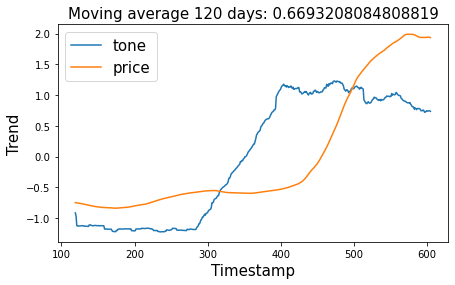

In [90]:
plt.figure(figsize=(7,4))
plt.plot(s)
plt.title("Moving average 120 days: {}".format(article_scaled[0].corr(price_scaled[0])), fontsize=15)
plt.xlabel("Timestamp", fontsize=15)
plt.ylabel("Trend", fontsize=15)
plt.legend(s.columns,fontsize=15)
print("* corr score: ",article_scaled[0].corr(price_scaled[0]))

In [972]:
analysis_df.sort_values(by='article_score',ascending=False)

,created_date,article,article_score,price,label
395,2020-09-30,유럽 암호화폐 거래소 비트판다 가 시리즈 투자로 만달러 약 억원의 투자금을 유치했...,2.3987455963078186,12513400.50469,1.00000
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.1405847963411846,8970286.25831,1.00000
307,2020-03-03,블록체인 기반 맛집 플랫폼 소다플레이 개발사 몬스터큐브가 암호화폐 지갑 서비스 비...,1.5411884098327666,10586310.61279,1.00000
464,2021-03-09,페이팔이 암호화폐 수탁업체 커브 인수를 확정했다 페이팔은 일 현지시간 올해 분기 ...,1.4977382807324084,60430299.86229,1.00000
553,2021-08-10,계 최대 규모 스테이블코인 테더 의 발행사 테더 가 예치금 구성에 대한 고서를...,1.4441789567214256,52648607.22477,1.00000
...,...,...,...,...,...
233,2019-09-10,이처럼 페이스북은 리브라를 출시하기에 앞서 규 당국을 설득하기 위해 분 히 움직...,0.9047440752619322,12234394.47368,0.00000
247,2019-10-16,도자료는 으로 도자료는 으로 도자료는 ...,0.897048508018637,9656952.17782,0.00000
347,2020-06-03,암호화폐 정 공시 플랫폼 쟁글 의 예약공시 도에 대한 원성이 들끓고 있다 일부...,0.8963518587556923,11481780.46218,0.00000
419,2020-12-02,오는 일부터 공인인증서가 폐지된다 대신 액티브엑스 등의 프로그램을 설치하지 않아도...,0.8712408418113071,20857794.01408,0.00000


<ipython-input-49-ad2f90731b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['article_score'] = [str(_).replace('inf','0.9309676763645697') for _ in analysis_df['article_score']]


,created_date,article,article_score,price,label
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,1.2939471518268237,9.024834e+06,1.0
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.1405847963411846,8.970286e+06,1.0
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,0.9797488220940854,8.437139e+06,0.0
4,2018-04-03,도자료는 으로,0.9491393674529895,7.904069e+06,1.0
5,2018-04-04,도자료는 으로 도자료는 으로 도자료는,0.918019318949795,7.943745e+06,1.0
...,...,...,...,...,...
602,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.0661978781685453,7.887421e+07,1.0
603,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,1.00698531993298,7.663260e+07,0.0
604,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.0778009622336067,7.517856e+07,1.0
605,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.1314813887929356,7.558171e+07,1.0


### Test comparison

In [4]:
corp_dic_comp = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/corp_dic_comp.csv')
corp_dic_comp

,Unnamed: 0,total,up,down
0,도/NNG,1495,863,632
1,자료/NNG,1283,722,561
2,으로/MAG,379,192,187
3,으로/NNG,275,150,125
4,비슷/NNG;위험/NNG,1,1,0
...,...,...,...,...
10984,현혹/NNG,2,2,0
10985,속였/VV,1,1,0
10986,소행/NNG,1,1,0
10987,염증/NNG,1,1,0


In [5]:
test = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/article_token.csv')
test

,created_date,article,token
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권..."
